# JDSZR6, Jonasz Krawczyk
## zadanie domowe nr 13

**treść zadania**

Na podstawie zbioru https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data dokonaj klasteryzacji różnych rodzajów noclegów oferowanych przez Airbnb. Proponowane zmienne do klasteryzacji:

latitude
longitude
Price
minimum nights
Number of reviews lub number of reviews per month
Proszę o wybranie minimum 4 zmiennych. Klasteryzacja pozwoli nam na znalezienie obiektów położonych w podobnym miejscu i o zbliżonych cenach i warunkach. Należy wyznaczyć optymalną liczbę klastrów z graficznym objaśnieniem. Trzeba pamiętać o zachowaniu poprawności założeń (np. standaryzacja zmiennych).


## 1. importy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

## 2. analiza danych

W tym punkcie będę chciał na tyle poeksplorować dane aby je zrozumieć. Zadaniem jest pogrupowanie obiektów; nie ma tu konkretnego targetu (uczenie nienadzorowane).

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')

In [3]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
df.shape

(48895, 16)

In [8]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Myślę, że niepotrzebne są zmienne: 'id', 'name', 'host_id', 'host_name', 'last_review', 'reviews_per_month'. Przy tej okazji dataframe zostanie oczyszczony z NaNów.

In [9]:
df.drop(
    ['id', 'name', 'host_id', 'host_name', 'last_review', 'reviews_per_month', 'calculated_host_listings_count'],
    axis=1,
    inplace=True)

Data Frame ma sens dla niezerowej ceny mieszkania i takiego które w ogóle można wynająć (jest dostępne w ciągu nadchodzącego roku). Dodatkowo, ponieważ jest to Air BnB to co do zasady powinno dotyczyć ofert krótkoterminowych. Usunę oferty od Januszy, którzy wrzucają swoje ogłoszenia na każdy portal:

In [10]:
df = df[df.price > 0]
df = df[df.availability_365 > 0]
df = df[df.minimum_nights < 30]

In [11]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,194
5,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,129


In [12]:
df.duplicated().any()

False

In [13]:
def value_counter(data_frame, list_of_variables):
    for i in list_of_variables:
        print(data_frame[i].value_counts())
        print()

In [14]:
variables = ['neighbourhood_group', 'neighbourhood', 'room_type', 'minimum_nights']

In [15]:
value_counter(df, variables)

Brooklyn         11167
Manhattan        10962
Queens            3989
Bronx              878
Staten Island      316
Name: neighbourhood_group, dtype: int64

Bedford-Stuyvesant    2259
Williamsburg          1889
Harlem                1566
Bushwick              1287
Hell's Kitchen        1149
                      ... 
Silver Lake              1
Willowbrook              1
Fort Wadsworth           1
Richmondtown             1
Rossville                1
Name: neighbourhood, Length: 218, dtype: int64

Entire home/apt    13648
Private room       12892
Shared room          772
Name: room_type, dtype: int64

1     7741
2     7713
3     5033
4     1958
5     1623
7     1074
6      427
29     320
14     307
10     247
28     170
15     158
20     134
21      72
8       68
25      50
9       47
12      47
13      26
18      16
11      16
24      12
26      11
27      11
16       9
17       7
22       6
19       5
23       4
Name: minimum_nights, dtype: int64



dość problematyczne jest 'neighbourhood', które w zasadzie ma 218 kategorii

In [16]:
cat_df = df.select_dtypes(include=['object'])
num_df = df.select_dtypes(exclude=['object'])
print("non numeric:", cat_df.columns)
print()
print("numeric:", num_df.columns)

non numeric: Index(['neighbourhood_group', 'neighbourhood', 'room_type'], dtype='object')

numeric: Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'availability_365'],
      dtype='object')


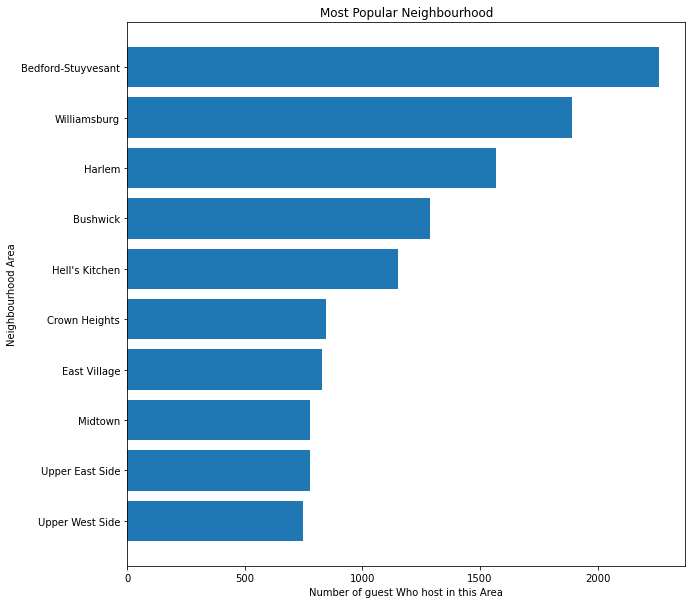

In [17]:
plt.figure(figsize=(10, 10))
data = df.neighbourhood.value_counts()[:10]
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()

plt.title("Most Popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest Who host in this Area")

plt.barh(x, y)
plt.show()

In [18]:
le = LabelEncoder()
df[cat_df.columns] = df[cat_df.columns].apply(
    lambda col: le.fit_transform(col))

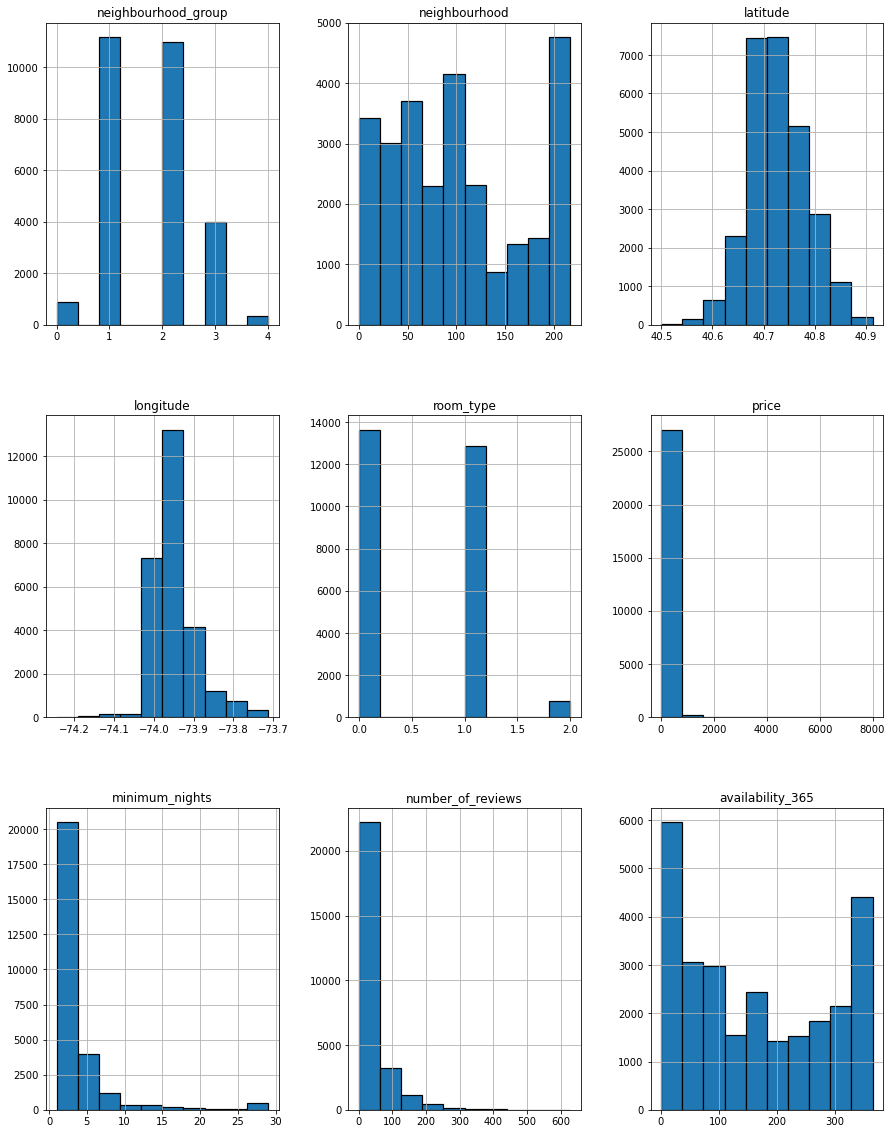

In [19]:
df.hist(edgecolor="black", linewidth=1.2, figsize=(15, 20))
plt.show()

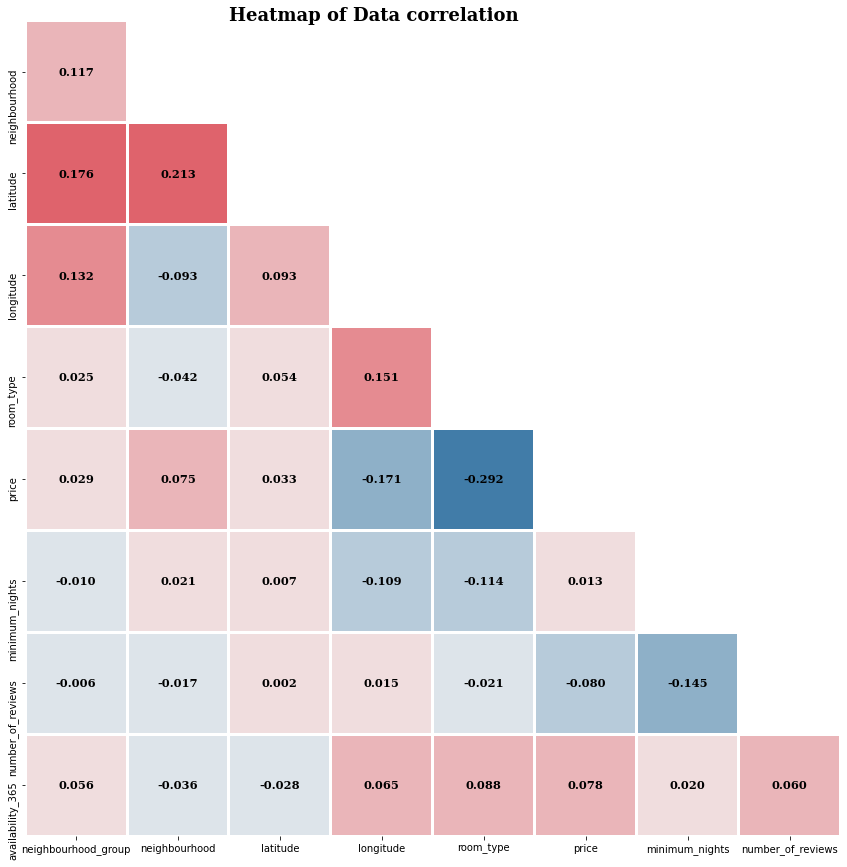

In [20]:
plt.figure(figsize=(15, 15))

df_copy1 = df.copy()
df_corr = df_copy1.corr()

color_map = sns.diverging_palette(240, 10, n=10)
mask = np.triu(np.ones_like(df_corr), k=0)
mask = mask[1:, :-1]
corr = df_corr.iloc[1:, :-1].copy()
sns.heatmap(corr,
            mask=mask,
            annot=True,
            fmt=".3f",
            cmap=color_map,
            center=0,
            vmin=-0.293,
            vmax=0.214,
            cbar=False,
            linewidth=2,
            square=True,
            annot_kws={
                'font': 'serif',
                'size': 11.5,
                'color': 'black',
                'fontweight': 'bold'
            })
plt.text(2,
         0,
         'Heatmap of Data correlation',
         fontsize=18,
         fontweight='bold',
         fontfamily='serif')
pass

nie ma tu zmiennych silnie skorelowanych; spodziewałem się większej zależności ceny od współrzędnych

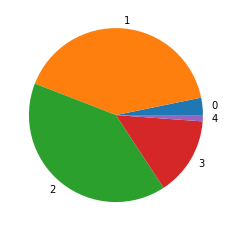

In [21]:
nei = df.groupby('neighbourhood_group')['longitude'].agg(['count'])
nei.reset_index(level=0, inplace=True)
plt.pie(nei['count'], labels=nei['neighbourhood_group'])
plt.show()

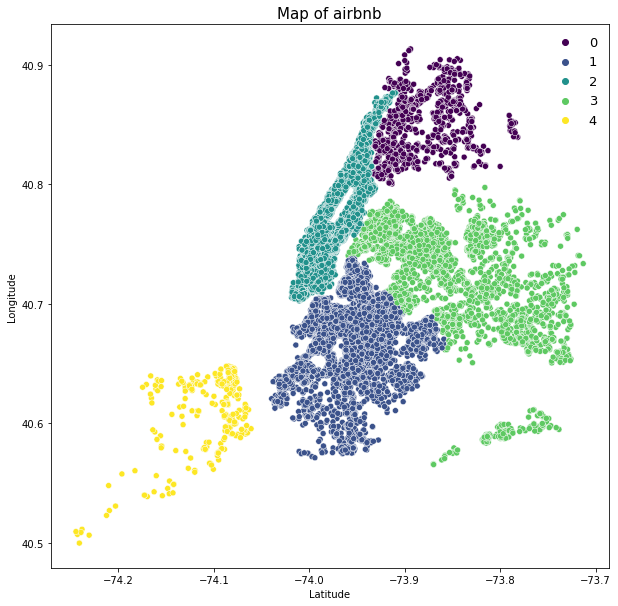

In [22]:
plt.figure(figsize=(10, 10))
a = sns.scatterplot(data=df,
                    x='longitude',
                    y='latitude',
                    hue='neighbourhood_group',
                    palette='viridis')
plt.title('Map of airbnb', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel("Longitude")
plt.legend(frameon=False, fontsize=13)

ktośby powiedział, że właśnie zrobiłem klasteryzację, idę do domu.

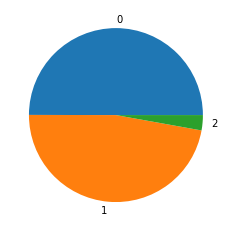

In [23]:
nei = df.groupby('room_type')['latitude'].agg(['count'])
nei.reset_index(level=0, inplace=True)
plt.pie(nei['count'], labels=nei['room_type'])
plt.show()

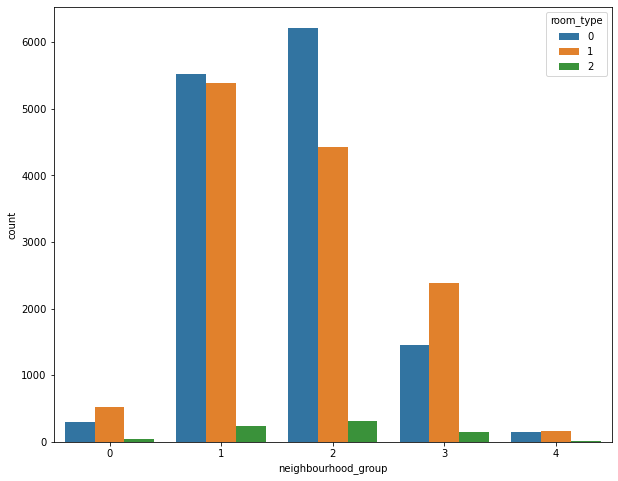

In [24]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(
    x=df['neighbourhood_group'],
    hue=df['room_type'])
plt.show()

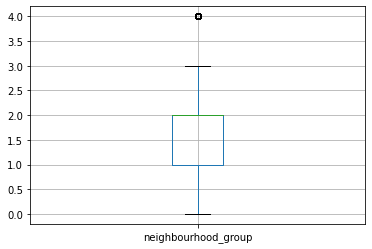

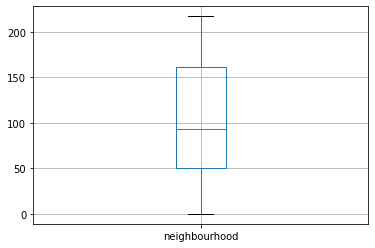

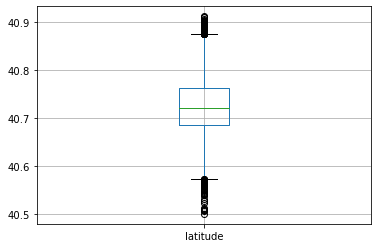

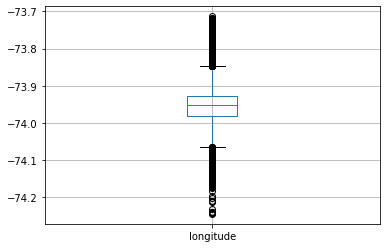

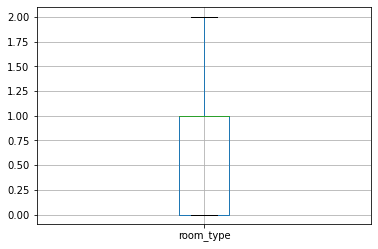

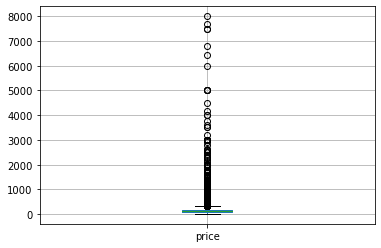

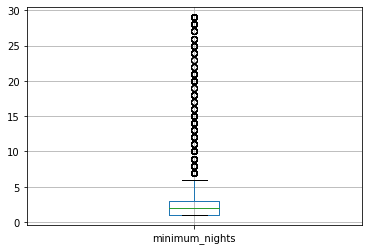

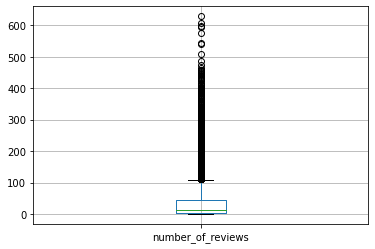

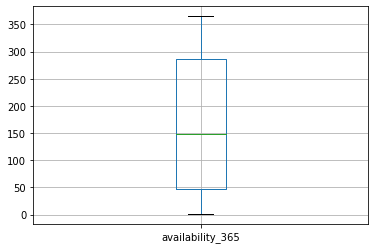

In [25]:
for column in df:
    plt.figure()
    df.boxplot([column])

outliery pozostawię, są w porządku.

## 3. przygotowanie zbioru, ustanowienie modelu

Dane znormalizuję a potem wystandaryzuję, taka kombinacja daje najlepsze /moim zdaniem/ efekty. Szczegółową analizę wraz z wnioskami dla różnych form preprocessingu znajdziesz w folderze Archiw gdzie próbuję co się da.

#### 3.1 outliery

In [26]:
# df.columns

In [27]:
# cols = [
#     'neighbourhood_group', 'neighbourhood', 'room_type', 'price',
#     'minimum_nights', 'number_of_reviews', 'availability_365'
# ]

In [28]:
# Q1 = df[cols].quantile(0.25)
# Q3 = df[cols].quantile(0.75)
# IQR = Q3 - Q1

# df = df[~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] >
#                                            (Q3 + 1.5 * IQR))).any(axis=1)]

#### 3.2 normalizacja

In [29]:
NoSc = MinMaxScaler()

In [30]:
dfs = df.copy()
dfs = NoSc.fit_transform(dfs)
dfs = pd.DataFrame(dfs, columns = df.columns)

#### 3.3 standaryzacja

In [31]:
StSc = StandardScaler()

In [32]:
# dfs = df.copy()
dfs = StSc.fit_transform(dfs)
dfs = pd.DataFrame(dfs, columns = df.columns)

In [33]:
dfs

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365
0,-0.871817,0.080520,-1.371505,-0.487275,0.852645,-0.038663,-0.550915,-0.489933,1.603145
1,0.380738,0.363869,0.462592,-0.702462,-0.955948,0.311622,-0.550915,0.179785,1.523029
2,0.380738,-0.128263,1.419993,0.087877,0.852645,-0.034054,-0.117214,-0.657363,1.603145
3,-0.871817,-0.918658,-0.720852,-0.249249,-0.955948,-0.315203,-0.550915,4.365520,0.233173
4,0.380738,0.513000,0.359767,-0.536919,-0.955948,0.196397,-0.117214,0.719279,-0.287577
...,...,...,...,...,...,...,...,...,...
27307,-0.871817,-1.336225,-0.835084,-0.064075,0.852645,-0.402774,-0.334065,-0.657363,-1.248961
27308,-0.871817,-1.112528,-0.432249,0.252664,0.852645,-0.541044,0.099636,-0.657363,-1.032649
27309,0.380738,-0.128263,1.519017,-0.039914,-0.955948,-0.195369,1.400738,-0.657363,-1.104753
27310,0.380738,-0.113350,0.529818,-0.841201,2.661237,-0.471909,-0.550915,-0.657363,-1.305041


#### 3.4 dla formalności - postawienie modelu

In [34]:
x = np.array(dfs)
kmeans = KMeans(random_state=997).fit(x)
cluser_labels = kmeans.labels_

## 4. wybór optymalnego K

ilość klastrów (tzw. "K" czy też "n_clusters") można dobrać np. następującymi metodami:<br>
- Metodą elbow: Tworzy się wykres sum wariancji klastrów do ilości klastrów. Wariancja spada wraz ze wzrostem ilości klastrów przy czym zakłada się, że przy pewnej ilości klastrów spadek wariancji nie jest szczególnie zauważalny jest to optymalne K. Dużo zależy od wstępnych założeń, poziomu akceptacji niepweności, indywidualnego podejścia oceniającego.
- Metodą Silhouette: Wykres tzw. wartości Silhouette (S) do ilości klastrów. Wartość Silhouette składa się z czynnika:<br>
'a' - średniej odległości obserwacji do innych obserwacji w ramach tego samego klastra,<br>
'b' - średniej odległości obserwacji do innych obserwacji w ramach najbliższego klastra,<br>
(S = \frac{(b - a)}{max(a, b)}\ <br>
S przybiera wartości [-1, 1], przy czym wartości ujemne informują, że próbki mogły zostać przypisane niewłaściwemu klastrowi. Stąd, im wyższe S tym lepiej zaś optymalnym K jest max(S).
- Graficznie: metoda intuicyjna i niezalecana ale akurat w przypadku mapki może stanowić dobry punkt kontrolny dla wyników.

Stworzę tu trzy listy ze zmiennymi i poobserwuję jak kształtują się wyniki klasteryzacji

In [35]:
feat_list_1 = [
    'neighbourhood_group', 'neighbourhood', 'room_type', 'price',
    'minimum_nights', 'number_of_reviews', 'availability_365'
]

In [36]:
feat_list_2 = [
    'neighbourhood_group', 'neighbourhood', 'room_type',
    'minimum_nights', 
]

In [37]:
feat_list_3 = ['number_of_reviews', 'price']

Użyję obu metod wyznaczania K, popatrzę też jak sprawa się ma do mapy miasta.

In [42]:
def k_searcher_plotter(feats):
    features = feats
    features.append('longitude')
    features.append('latitude')
    dfv = dfs[features]
    global x
    x = np.array(dfv)
    kmeans = KMeans(random_state=997).fit(x)
    cluser_labels = kmeans.labels_
    fig, ax1 = plt.subplots()

    k_vec = []
    int_vec = []
    sil_vec = []
    
    for k in range(2, 15):
        kmeans = KMeans(n_clusters=k, random_state=997).fit(x)
        interia = kmeans.inertia_
        int_vec.append(interia)
        score = silhouette_score(x, kmeans.labels_)
        sil_vec.append(score)
        k_vec.append(k)
        
    plt.title('clusters sum of variance')
    plt.plot(k_vec, int_vec, 'bo-')
    plt.xlabel('clusters number')
    plt.ylabel('sum of variance')
    plt.grid()
    plt.show()
    
    plt.title('Silhouette graph')
    plt.plot(k_vec, sil_vec, 'bo-')
    plt.xlabel('clusters number')
    plt.ylabel('Silhouette score')
    plt.grid()
    plt.show()

In [39]:
def map_plotter(clusters):
    kmeans = KMeans(n_clusters=clusters, random_state=997).fit(x)
    cluser_labels = kmeans.labels_
    plt.figure(figsize=(10, 10))
    plt.title('air BnB - clusterization')
    plt.xlabel('latitude-scaled')
    plt.ylabel('longitude-scaled')
    plt.scatter(x[:, -1], x[:, -2], c=cluser_labels, s=20, cmap='Dark2')
    plt.show()
    inertia = "{:,}".format(round(kmeans.inertia_))
    print("clusters inertia :", inertia)

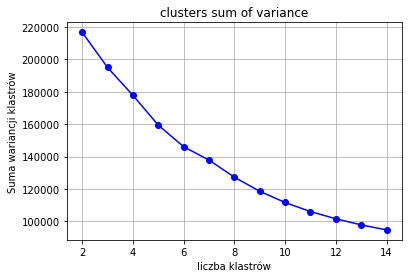

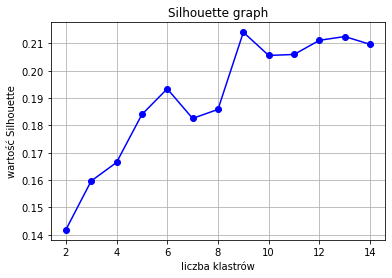

In [40]:
k_searcher_plotter(feat_list_1)

Na wykresie wariancji nie widać jasnej stabilizacji, dobrałbym K=10,<br>
Wartość Silhouete jest niska i wskazuje na 9kę. Byłem więc blisko. Użyję K=9.

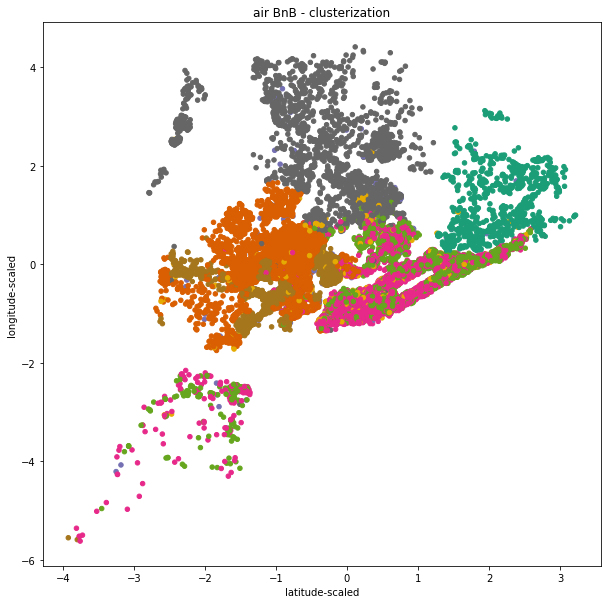

clusters inertia : 118,518


In [41]:
map_plotter(9)

Duża wariancja i brak jej stabilizacji nie budzą zaufania do takiej klasteryzacji. Niemniej jednak na mapce dzieje się już coś interesującego; spróbuję z mniejszą ilością danych.

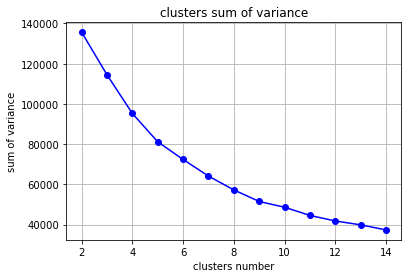

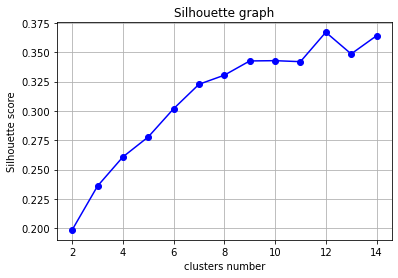

In [43]:
k_searcher_plotter(feat_list_2)

Na wykresie wariancji nadal nie widać jasnej stabilizacji, dobrałbym K=9,<br>
Wartość Silhouete jest już wyższa i wskazuje na 12kę. Użyję K=12.

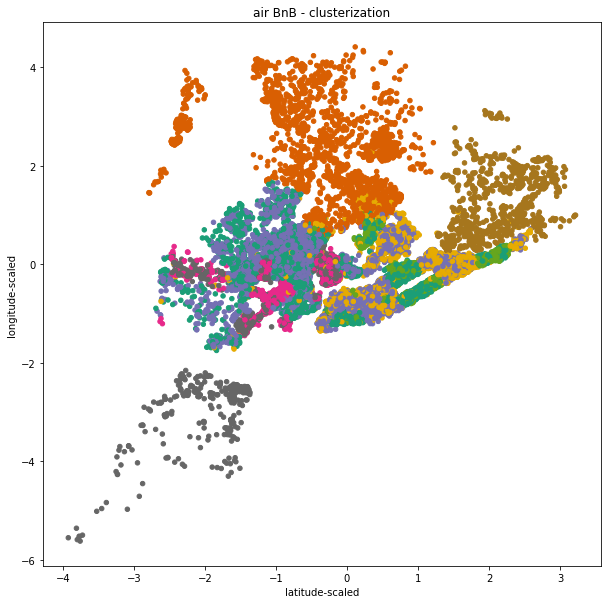

clusters inertia : 41,782


In [46]:
map_plotter(12)

Znacząco spadła wariancja, i na mapce klaruje się już jakaś zależność. Nie jestem przekonany czy 12 klastrów to nie za dużo na określenie typu klienta, na wyczucie może to być 5-6 typów. Spróbuję użyć jeszcze mniej informacji (tj. 4, zgodnie z poleceniem). <br>
Dodatkowo wygląda na to, że kilka klastrów się pokrywa. Wygląda to nienajlepiej ale nie jest błędem bo okreslamy typ klienta a nie przykładowo granice osiedli czy zasięg sieci komórkowej.

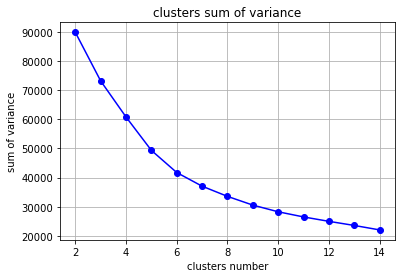

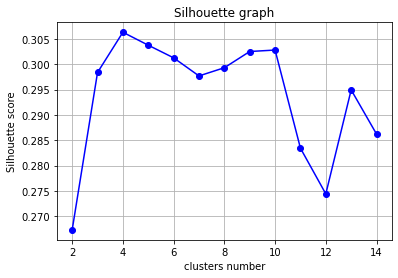

In [47]:
k_searcher_plotter(feat_list_3)

Na wykresie wariancji kształtuje się jakaś stabilizacja wartości, patrząc tylko na ten wykres dobrałbym K=7, co jak widać na wykresie obrazującym wartość Silhouete byłoby złą decyzją bo właśnie tam jest lokalne minimum. Warto więc było potrudzić się o skontrowanie metody. <br>
Sama wartość Silhouete jest jednak niższa od poprzedniej i wskazuje na 4kę, ewentualnie 9-10. Użyję K=10 ponieważ wariancja spada w tym przypadku o połowę (względem K=4) a wartość Silhouette prawie w ogóle.

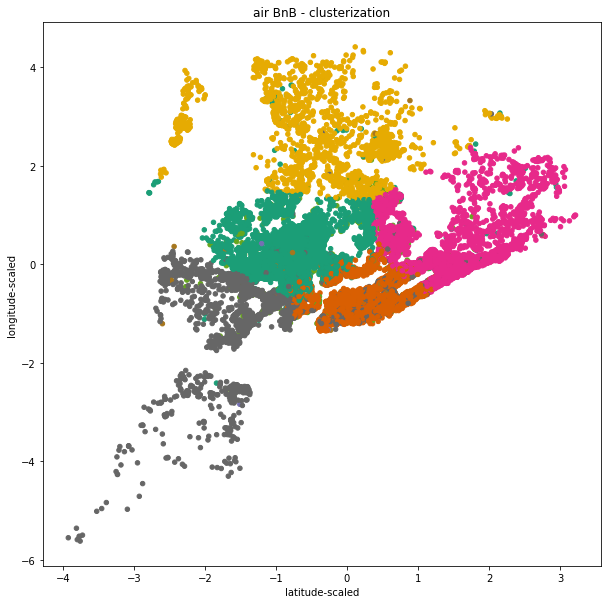

clusters inertia : 28,272


In [51]:
map_plotter(10)

W tym przypadku wariancja spadła o około 40% ale pogorszyła się wartość 'S'. Klasteryzacja 'wygląda' dobrze ale za to mamy mało Feature'ów więc taki podział jest mało miarodajny.

## 5. podsumowanie i wnioski

Wraz ze spadkiem ilości cech modelu, spada także suma wariancji, znaczy dopasowanie jest lepsze. Spadek ilości cech modelu stawia jednak całą sprawę w wątpliwość czy w ogóle jest sens dzielić ludzi na grupy rozeznając tylko parę charakterystycznych aspektów. Jak na mój gust w pewnym momencie trzeba się pogodzić z błędem oszacowania na rzecz kompletności informacji. Kwestia gustu ogólnie choć można wesprzeć się czynnikiem miarodajnym jak np. średnia odległość obserwacji do klastrów; 'inertia', która znacząco spadła 120k do 40k przy redukcji cech z 9 na 6 i nie tak znacząco (40k do 30k) przy redukcji cech z 6 na 4. <br>
Na ostatniej mapce ukształtowały się ramy terytorialne podziału rynku jakby ktoś potrzebował wprowadzać praktyki mafijne. Taki model jednak ma małą ilość zmiennych, ledwie cztery, z czego dwie to współrzędne.<br>
Duże znaczenie na wyniki ma także odpowiedni dobór zestawu cech wejściowych do modelu.<br>
Model można dopracować na bazie ostatniego tak, aby klastry nie były 'jedzone' przez dominujące grupy, zalecałbym także spróbować dodać cechę do listy.<br>
Moim zdaniem najbardziej zbalansowany wynik obrazuje drugi przypadek gdzie ilość cech jest jeszcze w porządku, mamy najwyższą wartość wskaźnika Silhouette i mapka jest w miarę czytelna. Jedyny minus to podział na 12 klastrów: może to być za dużo dla biznesu oferującego noclegi krótkoterminowe. Najczęściej ludzie po prostu potrzebują zostać na parę dni w mieście, pozwiedzać czy pozałatwiać interesy, w tym czasie da się przeżyć bez szczególynych udogodnień; uważam, że 5-6 głównych grup byłoby bardziej uzasadnione.

### 6. dodatek - dane po PCA

Wykonam klasteryzację ponownie ale dane poddam dodatkowo analizie PCA. Trochę z ciekawości ale też spodziewam się przyjemniejszej dla oka wizualizacji kosztem mierzalnych paramsów.

In [54]:
def k_searcher_plotter_pca(feats):
    features = feats
    features.append('longitude')
    features.append('latitude')
    dfv = dfs[features]
    global x
    x = np.array(dfv)
    pca = PCA(n_components=2).fit(x)
    pca_2d = pca.transform(x)    
    kmeans = KMeans(random_state=997).fit(x)
    cluser_labels = kmeans.labels_
    fig, ax1 = plt.subplots()

    k_vec = []
    int_vec = []
    sil_vec = []
    
    for k in range(2, 15):
        kmeans = KMeans(n_clusters=k, random_state=997).fit(x)
        interia = kmeans.inertia_
        int_vec.append(interia)
        score = silhouette_score(x, kmeans.labels_)
        sil_vec.append(score)
        k_vec.append(k)
        
    plt.title('clusters sum of variance')
    plt.plot(k_vec, int_vec, 'bo-')
    plt.xlabel('clusters number')
    plt.ylabel('sum of variance')
    plt.grid()
    plt.show()
    
    plt.title('Silhouette graph')
    plt.plot(k_vec, sil_vec, 'bo-')
    plt.xlabel('clusters number')
    plt.ylabel('Silhouette score')
    plt.grid()
    plt.show()

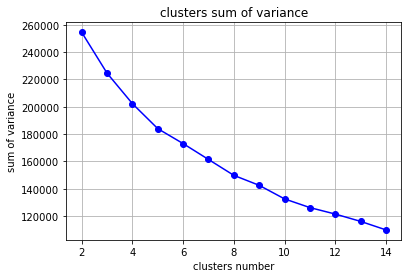

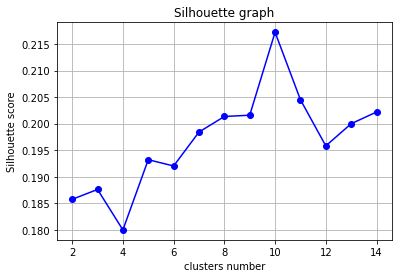

In [53]:
k_searcher_plotter_pca(feat_list_1)

Poprzednio wybranym K było 9 dla którego wariancja wynosiła około 120k (tu K=10, w=135k), wartość Silhouette nie zmieniła się.

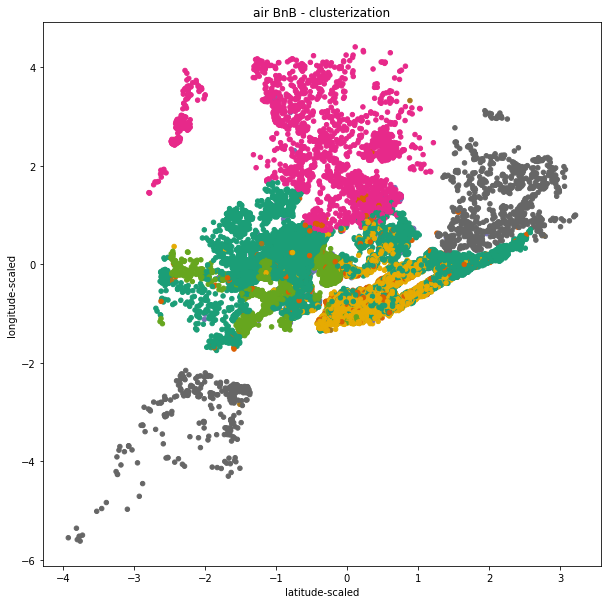

clusters inertia : 132,495


In [55]:
map_plotter(10)

W porównaniu do danych nie poddanych analizie PCA inercja wzrosła o około 10%. To dużo, biorąc pod uwagę, że zwiększyła się ilość klastrów (powinna zmaleć).

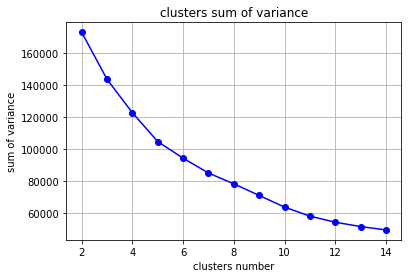

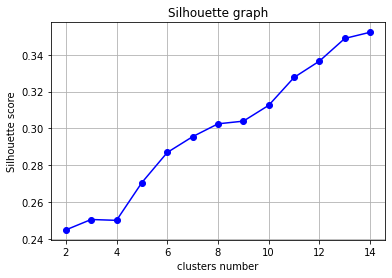

In [56]:
k_searcher_plotter_pca(feat_list_2)

Z wykresu wariancji wybrałbym 9. Wartość Silhouette największa jest dla 14 klastrów  przy czym nie wiemy czy to dość (funkcja nie rysuje dla większych K).<br>
Poprzednio użyto K=12 gdzie wariancja wynosiła 40k, wskaźnik Silhouette około 0,36. Teraz K=14, var=50k, S=0,35. To jednoznaczne pogorszenie przyporządkowania.

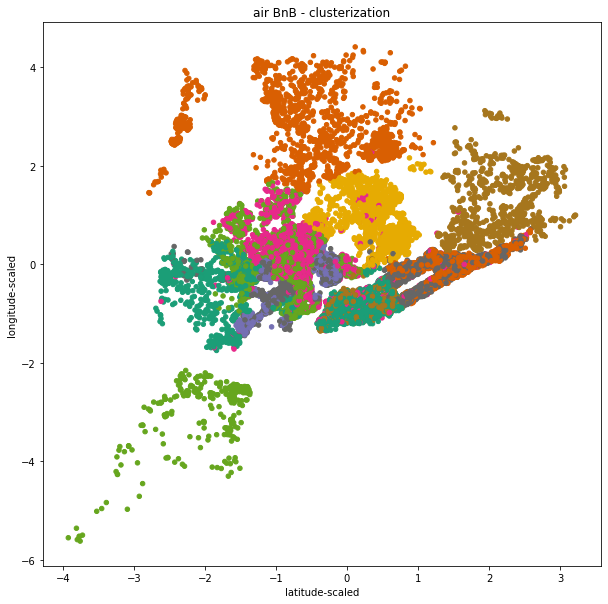

clusters inertia : 49,311


In [57]:
map_plotter(14)

W porównaniu do danych nie poddanych analizie PCA inercja wzrosła o około 16%. To niekorzystne, szczególnie biorąc pod uwagę, że zwiększyła się ilość klastrów o dwa.

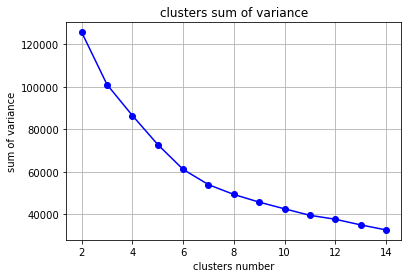

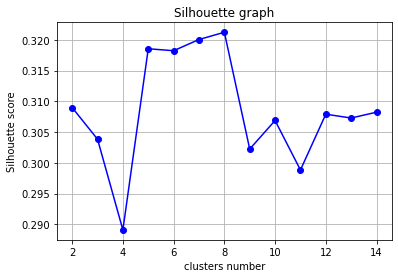

In [58]:
k_searcher_plotter_pca(feat_list_3)

Z wykresu wariancji wybrałbym 7 i jak widać na drugim wykresie prawie bym trafił w optymum.<br>
poprzednio K = 10, var = 30k, S = 0.3<br>
obecnie K = 8, var = 50k, S = 0,32

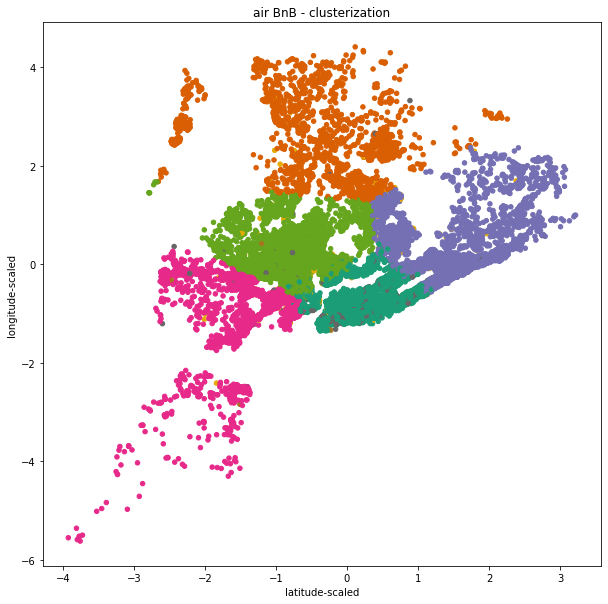

clusters inertia : 49,282


In [59]:
map_plotter(8)

Inercja wzrosła o ponad 40% ale tez spadła ilość klastrów. Jest jednak wysoka jak na tak małą ilość cech. Mapka jest ładna i czytelna, pomijając fakt, że gdzieś tam kryją się jeszcze 3 klastry.

### 7. Wnioski po PCA i uwagi końcowe

- Wariancja i inercja modelu rosną po analizie PCA. wartość Silhouette pozostaje na podobnym poziomie. W mojej ocenie klasteryzacja wizualnie jest może trochę lepsza, ale parametry liczbowe się pogorszyły<br>
- Nie potrafię podać jasnej odpowiedzi który model uważam za najlepszy, wszystkie mają swoje plusy i minusy, co szczegółowo opisuję pod wykresami. <br>
Myślę, że gdybym miał drążyć temat to wybrałbym ilość cech pomiędzy feature_list_2 a feature_list_3 i popróbował powsadzać też inne zmienne. Danych nie podddawałbym już analizie PCA.<br>
- W zestawie danych zawsze znajdują się współrzędne. To nie znaczy, że to dobrze i tak ma być bo przecież to jest miasto: tak wybrałem aby wizualizacja była atrakcyjna i scattery porównywalne. Współrzędne także bym usuwał/dodawał w ramach optymalizacji modelu.<br>
- W ramach ciekawostki tylko pierwsza mapka notebooka przypisała 2 grupy w ramach Staten Island.<br>
- poszukiwanie optymalnego K dwoma metodami na raz dodaje wyznaczającemu komfort porównania wyników i możliwość potwierdzenia lub zadecydowania co jest ważniejsze.<br>
- wyznaczanie wskaźnika Silhouette obciąża komputer i jest długotrwałe. Daje natomiast jednoznaczny wynik co do zasady (chociaż raz zdarzyło mi się nie zastosować bo wolałem niższą wariancję).

## BRUDNOPIS